# Analysis of hydrogen exports and hydrogen infrastructure

In [1]:
import pes_analysis_helpers as ana
import pandas as pd
import pypsa
import matplotlib.pyplot as plt

Choose your root directory

In [2]:
root_directory = 'Thesis_Code'
ana.sets_path_to_root(root_directory)

This is the repository path:  /nfs/home/cas96273/Thesis_Code
Had to go 2 folder(s) up.


Choose one or multiple runs to be analyzed. In the latter case, you should declare respective variables. In the following, only one run is analyzed.

In [3]:
run_name = 'BR_2050_daily_07082023'

Read summary dataframe. If it does not exist yet it will be created and stored in ./pypsa-earth-sec/outputs

In [36]:
summary = ana.get_summary_df(run_name).set_index(['year', 'scenario', 'export_quantity'])

In [5]:
summary_h2 = summary[['system_costs', 'system_costs_add_ex', 'exp_h2_cost_norm',
       'exp_h2_cost_norm_add_ex', 'exp_h2_cost_mp', 'electrolyzer_cap',
       'electrolyzer_cf', 'uhs_cap', 'pipeline_cap']]
summary_exp_ports = summary.filter(like=' H2 export ')

In [6]:
summary_h2

system_costs  system_costs_add_ex  \
year scenario export_quantity                                      
2050 BS       0                1.202453e+11         1.514667e+11   
              10               1.211180e+11         1.524017e+11   
              100              1.278265e+11         1.598182e+11   
              500              1.607976e+11         1.960460e+11   
              1000             1.964865e+11         2.453241e+11   
              3000             3.405501e+11         4.761970e+11   
     AP       0                1.094545e+11         1.302777e+11   
              10               1.100022e+11         1.308684e+11   
              100              1.141256e+11         1.354281e+11   
              500              1.336381e+11         1.571463e+11   
              1000             1.537208e+11         1.864950e+11   
              3000             2.322732e+11         3.213957e+11   
     NZ       0                6.544287e+10         8.193888e+10   
              10               6.583918e+10         8.237036e+10   
              100              6.893606e+10         8.585858e+10   
              500              8.323967e+10         1.019679e+11   
              1000             9.743362e+10         1.233269e+11   
              3000             1.477001e+11         2.155396e+11   

                               exp_h2_cost_norm  exp_h2_cost_norm_add_ex  \
year scenario export_quantity                                              
2050 BS       0                        0.000000                 0.000000   
              10                       2.906012                 3.113533   
              100                      2.524528                 2.781050   
              500                      2.700784                 2.968986   
              1000                     2.538832                 3.125451   
              3000                     2.445383                 3.604507   
     AP       0                        0.000000                 0.000000   
              10                       1.824112                 1.966812   
              100                      1.555501                 1.715079   
              500                      1.610630                 1.789443   
              1000                     1.474070                 1.872035   
              3000                     1.363288                 2.121409   
     NZ       0                        0.000000                 0.000000   
              10                       1.319685                 1.436841   
              100                      1.163231                 1.305262   
              500                      1.185266                 1.333930   
              1000                     1.065292                 1.378220   
              3000                     0.913056                 1.482968   

                               exp_h2_cost_mp  electrolyzer_cap  \
year scenario export_quantity                                     
2050 BS       0                      0.000000      5.440348e+04   
              10                     3.156296      5.875350e+04   
              100                    2.871821      9.712993e+04   
              500                    3.108037      2.864816e+05   
              1000                   3.358075      5.313817e+05   
              3000                   4.735136      1.331982e+06   
     AP       0                      0.000000      2.915250e+05   
              10                     1.978225      2.965395e+05   
              100                    1.747131      3.396238e+05   
              500                    1.855133      5.418667e+05   
              1000                   1.979328      7.931756e+05   
              3000                   2.941185      1.608708e+06   
     NZ       0                      0.000000      3.772984e+05   
              10                     1.450024      3.823902e+05   
              100                    1.317386      4.281993e+05   
          

# Costs of hydrogen to be exported

### Average normalized costs

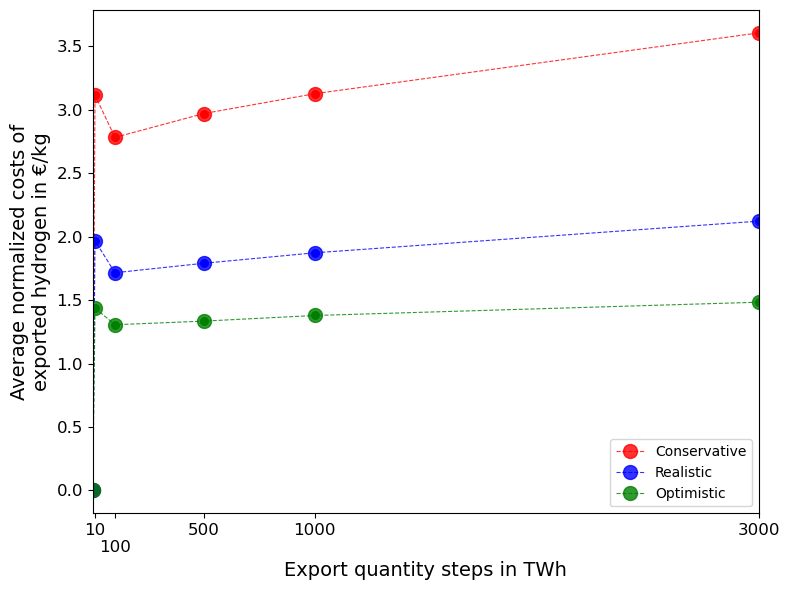

In [7]:
ana.plot_average_h2_costs(summary)

### Marginal prices

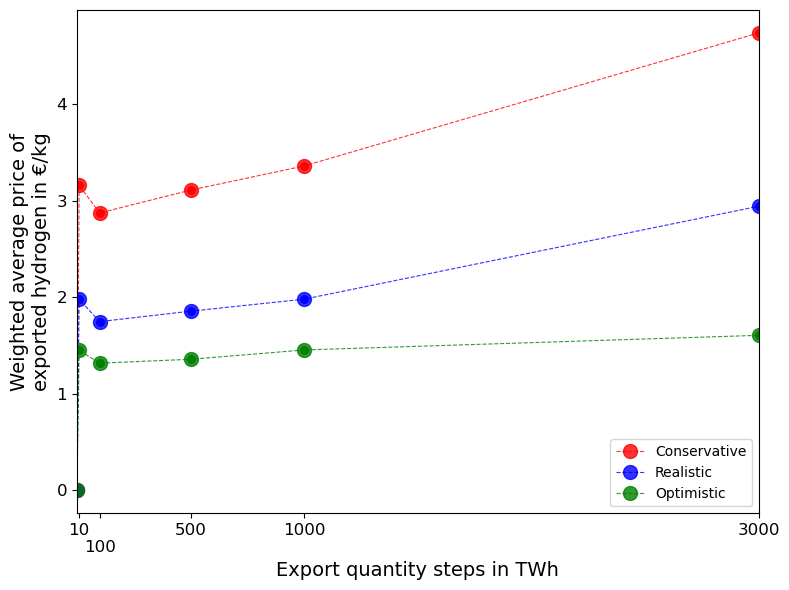

In [8]:
ana.plot_h2_mp_exp(summary)

# Electrolyzer capacities

### Total capacities and export locations

In [9]:
elec_cap = pd.concat([summary_h2.filter(like='electrolyzer_cap'), summary_exp_ports.filter(like='electrolyzer cap')], axis=1)

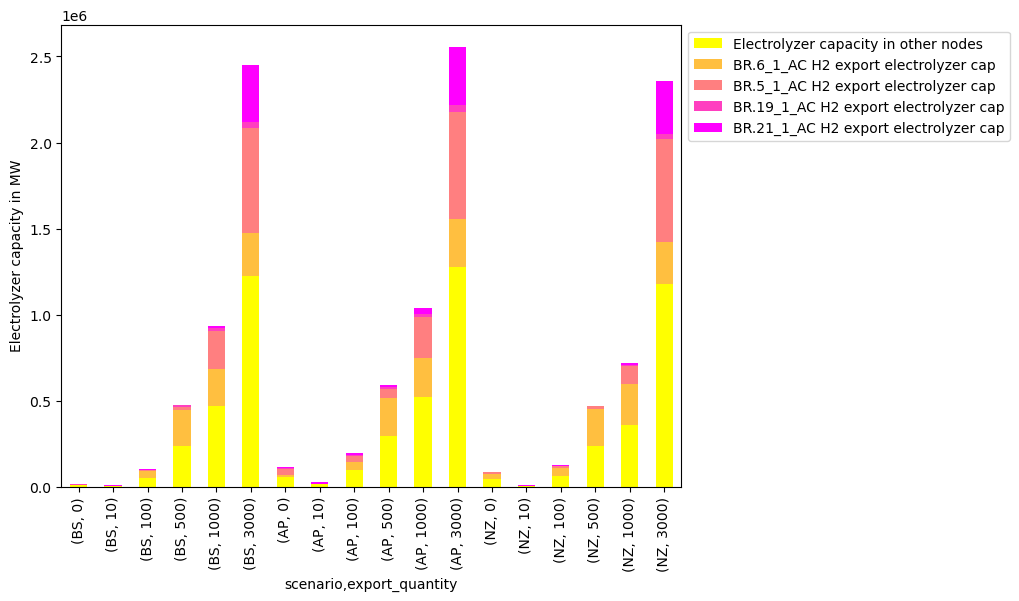

In [10]:

ana.plot_electrolyzer_caps(elec_cap)

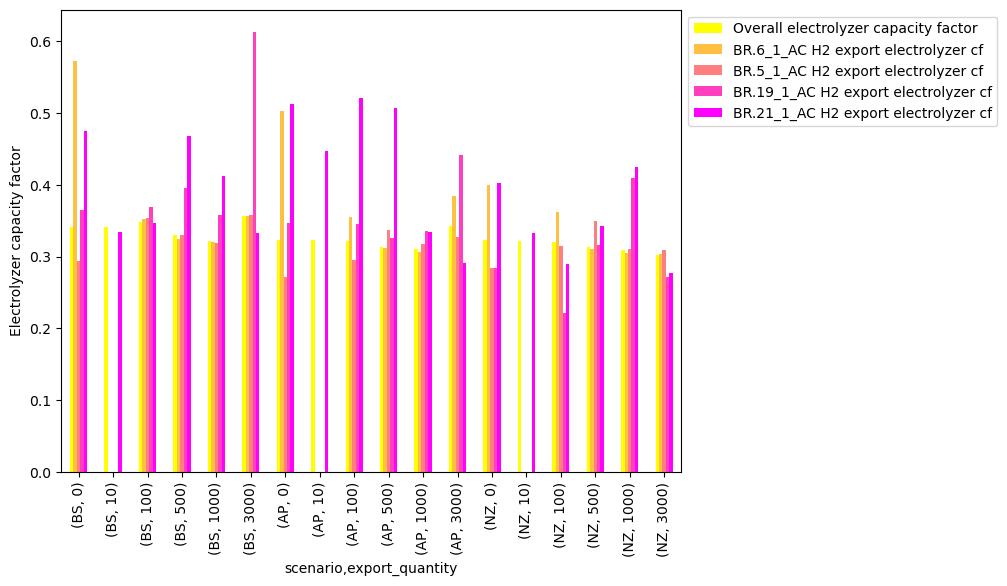

In [11]:
ana.plot_electrolyzer_cf(summary)

# H2 delivery series

Networks need to be loaded to render the remaining outputs.

In [12]:
ns = ana.get_networks(summary)

INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_10export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_100export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_500export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_1000export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_3000export.nc

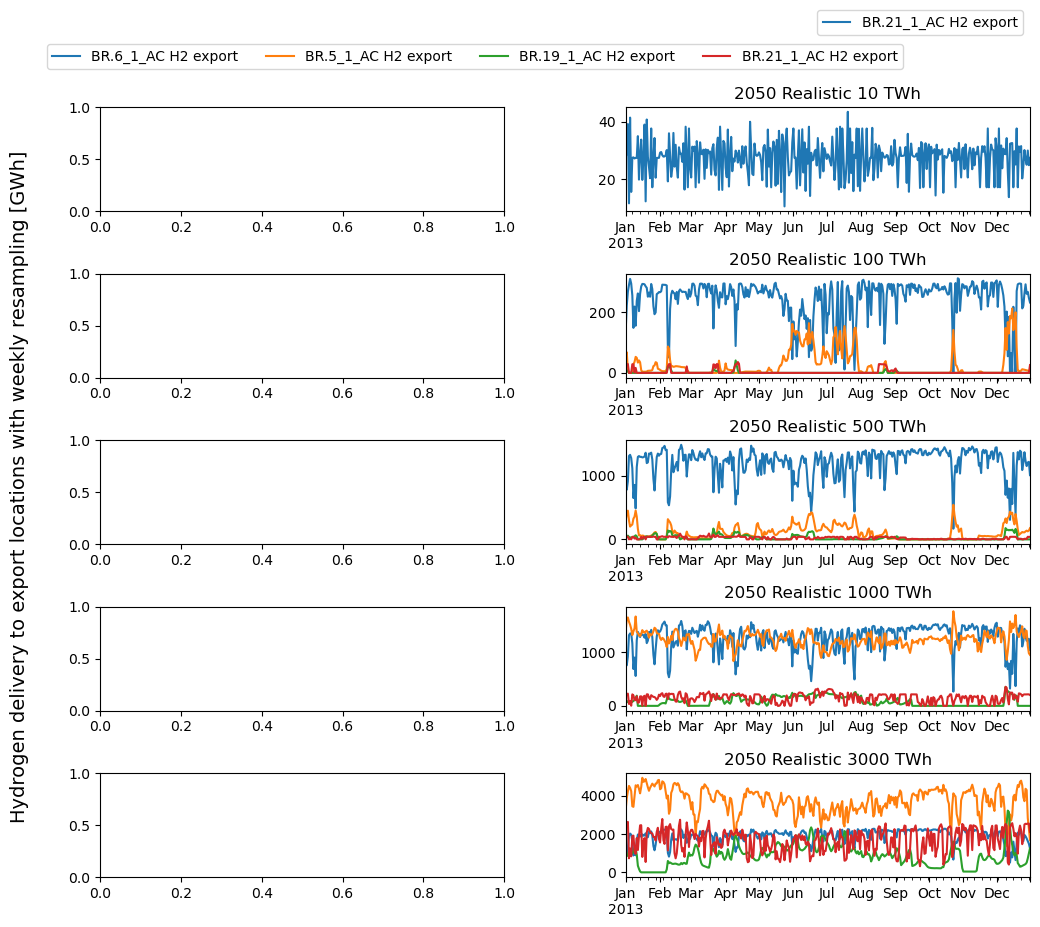

In [13]:
ana.plot_h2_exports(ns, summary, 'D')

# H2 infrastructure plot

In [14]:
ana.get_network(summary, 2050, 'NZ', 500).links.filter(like='ectrolysis', axis=0).p_nom_opt.sort_values(ascending=False)

INFO:pypsa.io:Imported network elec_s_314_ec_lv1.25_Co2L_3H_2050_0.045_NZ_500export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Link
BR.6_1_AC H2 Electrolysis     217204.570961
BR.25_1_AC H2 Electrolysis    141673.322142
BR.9_1_AC H2 Electrolysis     105322.668682
BR.13_1_AC H2 Electrolysis     66507.693682
BR.20_1_AC H2 Electrolysis     41427.933166
BR.18_1_AC H2 Electrolysis     24636.244276
BR.5_1_AC H2 Electrolysis      14139.192950
BR.15_1_AC H2 Electrolysis      4496.384392
BR.2_1_AC H2 Electrolysis       3124.999933
BR.21_1_AC H2 Electrolysis      2842.043462
BR.27_1_AC H2 Electrolysis      2315.952832
BR.16_1_AC H2 Electrolysis      1971.597776
BR.22_1_AC H2 Electrolysis      1112.569592
BR.11_1_AC H2 Electrolysis      1098.415275
BR.19_1_AC H2 Electrolysis       653.851257
BR.26_1_AC H2 Electrolysis       619.136154
BR.12_1_AC H2 Electrolysis       584.221156
BR.10_1_AC H2 Electrolysis       333.370184
BR.24_1_AC H2 Electrolysis       297.148790
BR.14_1_AC H2 Electrolysis       289.538070
BR.17_1_AC H2 Electrolysis       238.800492
BR.7_1_AC H2 Electrolysis        218.431152
BR.23_1_AC H2 Electrolysis 

Link
H2 pipeline BR.7_1_AC -> BR.9_1_AC                 0.000000
H2 pipeline BR.5_1_AC -> BR.8_1_AC repurposed      0.000000
H2 pipeline BR.27_1_AC -> BR.9_1_AC repurposed     0.000000
H2 pipeline BR.26_1_AC -> BR.5_1_AC repurposed     0.000000
H2 pipeline BR.26_1_AC -> BR.2_1_AC repurposed     0.000000
H2 pipeline BR.10_1_AC -> BR.18_1_AC               0.000000
H2 pipeline BR.10_1_AC -> BR.27_1_AC               0.000000
H2 pipeline BR.19_1_AC -> BR.25_1_AC repurposed    0.000000
H2 pipeline BR.11_1_AC -> BR.25_1_AC               0.000000
H2 pipeline BR.5_1_AC -> BR.8_1_AC                 0.000000
H2 pipeline BR.19_1_AC -> BR.25_1_AC               0.000000
H2 pipeline BR.13_1_AC -> BR.8_1_AC                0.000000
H2 pipeline BR.21_1_AC -> BR.24_1_AC               0.000000
H2 pipeline BR.22_1_AC -> BR.4_1_AC                0.000000
H2 pipeline BR.26_1_AC -> BR.2_1_AC                0.000000
H2 pipeline BR.26_1_AC -> BR.5_1_AC                0.000000
H2 pipeline BR.27_1_AC -> BR.9_1_AC

/nfs/home/cas96273/.conda/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


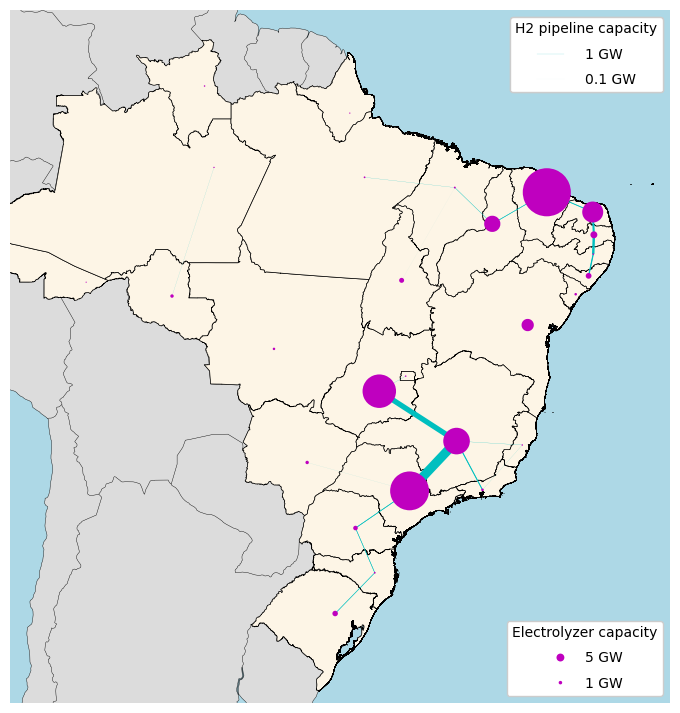

In [15]:
ana.plot_h2_infra(ns[2050]['NZ'][500])

# Underground hydrogen storages

### Capacities

In [19]:
ns

{2050: {'BS': {0: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 461
    - GlobalConstraint: 2
    - Line: 45
    - Link: 1511
    - Load: 821
    - StorageUnit: 18
    - Store: 353
   Snapshots: 2920,
   10: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 461
    - GlobalConstraint: 2
    - Line: 45
    - Link: 1508
    - Load: 821
    - StorageUnit: 18
    - Store: 353
   Snapshots: 2920,
   100: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 461
    - GlobalConstraint: 2
    - Line: 45
    - Link: 1511
    - Load: 821
    - StorageUnit: 18
    - Store: 353
   Snapshots: 2920,
   500: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 461
    - GlobalConstraint: 2
    - Line: 45
    - Link: 1511
    - Load: 821
    - StorageUnit: 18
    - Store: 353
   Snapshots: 2920,
   1000: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 461
   

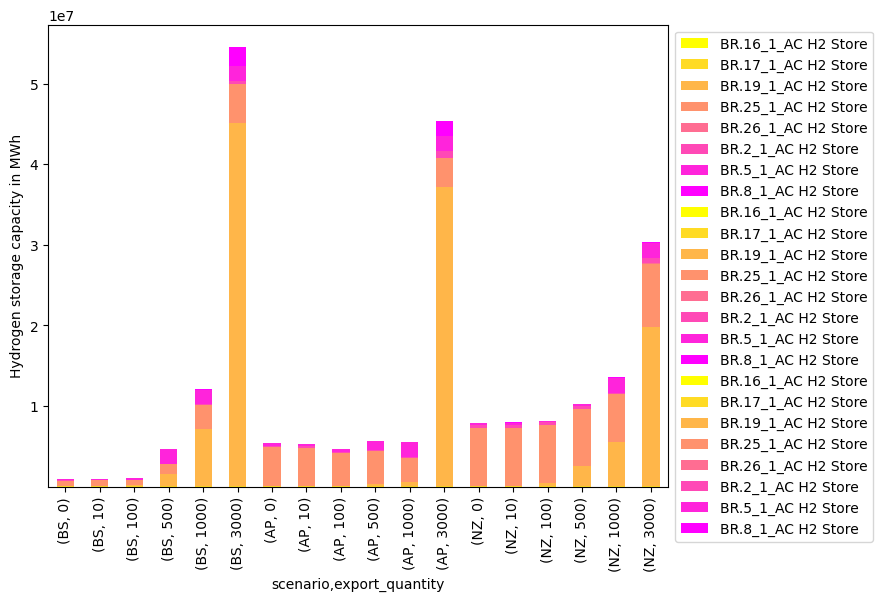

In [35]:
def plot_uhs_caps(ns):
    df = pd.DataFrame()
    for y in ns.keys():
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(8, 6)
        ns_y = ns[y]
        for s in ns_y.keys():
            ns_y_s = ns_y[s]
            for (idx, q) in enumerate(ns_y_s.keys()):
                n = ns_y_s[q]
                n_uhs = n.stores.filter(like='H2 Store', axis=0)
                n_uhs = n_uhs[n_uhs.e_nom_opt > 0].e_nom_opt.to_frame().T
                n_uhs.index = [idx]

                df_n = pd.DataFrame(data={'scenario':s, 'export_quantity':q}, index=[idx])
                df_n = pd.concat([df_n, n_uhs], axis=1)
                df = pd.concat([df, df_n])
            df.set_index(['scenario', 'export_quantity']).plot.bar(stacked=True, ax=ax, cmap='spring_r')
            ax.set_ylabel('Hydrogen storage capacity in MWh')
            ax.legend(bbox_to_anchor=(1,1))

                    # df_y['electrolyzer_cap'] = df_y.filter(like='electrolyzer cap').sum(axis=1)
                    # df_y.rename({'electrolyzer_cap':'Electrolyzer capacity in other nodes'}, inplace=True, axis=1)
                    # df_y.set_index(['scenario', 'export_quantity']).plot.bar(stacked=True, ax=ax, cmap='spring_r')

                    # ax.set_ylabel('Electrolyzer capacity in MW')
                    # ax.legend(bbox_to_anchor=(1,1))
plot_uhs_caps(ns)

In [41]:
ns[2050]['NZ'][500].generators.carrier.unique()

array(['CCGT', 'biomass', 'coal', 'oil', 'OCGT', 'ror', 'nuclear', 'csp',
       'rooftop-solar', 'solar', 'onwind', 'onwind2', 'offwind',
       'offwind2', 'gas', 'residential rural solar thermal',
       'services rural solar thermal',
       'residential urban decentral solar thermal',
       'services urban decentral solar thermal',
       'urban central solar thermal'], dtype=object)

In [44]:
summary.electricity_mix_rel.iloc[0]

'carrier\nsolar            5.570386e-01\nhydro            1.458983e-01\nOCGT             1.117702e-01\nror              6.177192e-02\nbiomass          6.055619e-02\nCCGT             2.096094e-02\nonwind           1.615645e-02\ncoal             1.590454e-02\nnuclear          8.005252e-03\noil              1.937598e-03\ncsp              1.406845e-10\nrooftop-solar    1.311692e-10\noffwind          7.116858e-11\nonwind2          6.418626e-11\noffwind2         2.675646e-11'

In [ ]:
def plot_uhs_storages(ns):
    

{2030: {'BS': {0: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 378
    - GlobalConstraint: 2
    - Line: 59
    - Link: 1315
    - Load: 821
    - StorageUnit: 10
    - Store: 353
   Snapshots: 2920,
   1: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 378
    - GlobalConstraint: 2
    - Line: 59
    - Link: 1315
    - Load: 821
    - StorageUnit: 10
    - Store: 353
   Snapshots: 2920,
   10: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 378
    - GlobalConstraint: 2
    - Line: 59
    - Link: 1315
    - Load: 821
    - StorageUnit: 10
    - Store: 353
   Snapshots: 2920,
   50: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 378
    - GlobalConstraint: 2
    - Line: 59
    - Link: 1315
    - Load: 821
    - StorageUnit: 10
    - Store: 353
   Snapshots: 2920,
   86: PyPSA Network
   Components:
    - Bus: 570
    - Carrier: 37
    - Generator: 378
    - Gl